In [1]:
import numpy as np
import torch
from utils import LinCKA
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group
import sys

# First Try

In [6]:
# Parameters
mean1 = 0
mean2 = 0
var1 = 1
var2 = 1

num_dim = 100
num_pts = 10000 # per mixture component

seed = 0
np.random.seed(seed)
d = np.random.normal(0,1,[num_dim])
d /= np.linalg.norm(d)
c = 10000

In [7]:
cuda = torch.device('cuda')

X = np.concatenate( [np.random.normal(mean1, var1, [num_pts, num_dim]), np.random.normal(mean2, var2, [num_pts, num_dim])], axis = 0)
# Y = torch.Tensor(X + np.concatenate([np.zeros([num_pts, num_dim]), c*np.matmul(np.ones([num_pts,1]), d.reshape([1,num_dim]))], axis = 0)).to(cuda)
Y = torch.Tensor(X + c*np.matmul(np.ones([num_pts*2,1]), d.reshape([1,num_dim]))).to(cuda)

X = torch.Tensor(X).to(cuda)

In [8]:
CKA = LinCKA()
CKA(X,Y)[0].item()

0.0020316550508141518

# Automatic + tests

In [3]:
cuda = torch.device('cuda')

def get_cka_test(mean1 = 0,
                 mean2 = 0,
                 var1 = 1,
                 var2 = 1,
                 num_dims = 100,
                 num_pts = 1000,
                 seed = 0,
                 c = 1000):
    np.random.seed(seed)
    
    d = np.random.normal(0,1,[num_dims])
    d /= np.linalg.norm(d)
    
    X = np.concatenate( [np.random.normal(mean1, var1, [num_pts, num_dims]), np.random.normal(mean2, var2, [num_pts, num_dims])], axis = 0)
    Y = torch.Tensor(X + np.concatenate([np.zeros([num_pts, num_dims]), c*np.matmul(np.ones([num_pts,1]), d.reshape([1,num_dims]))], axis = 0)).to(cuda)

    X = torch.Tensor(X).to(cuda)
    CKA = LinCKA()
    return(CKA(X,Y)[0].item())

# First round of experiments

### Generate and save the data

In [ ]:
num_pts_list = [100, 500, 1000, 5000, 10000] #20000 points makes it crash
num_dims_list = [3, 5, 10, 50, 100, 200, 300, 500, 1000]
c_list = [1, 5, 10, 50, 100, 500, 1000, 5000]


data = np.zeros([len(num_pts_list), len(num_dims_list), len(c_list)])
for i1, num_pts in enumerate(num_pts_list):
    for i2, num_dims in enumerate(num_dims_list):
        for i3, c in enumerate(c_list):
            print('Num pts {}; num dims {}; c {}'.format(num_pts, num_dims, c))
            data[i1, i2, i3] = get_cka_test(num_dims = num_dims, num_pts = num_pts, c = c)
            
np.save('data/gaussian_exp.npy', data)

### Analyze results

Text(0.5, 1.0, 'CKA according to "c", the distance between the first and\nsecond Gaussians in the second set of representations')

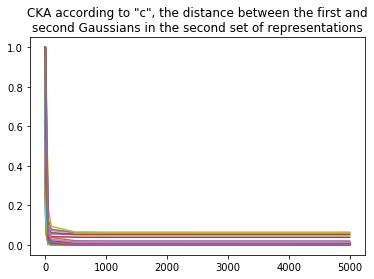

In [13]:
for i in range(len(num_pts_list)):
    for j in range(len(num_dims_list)):
        plt.plot(c_list, data[i,j,:])
        
plt.title('CKA according to "c", the distance between the first and\nsecond Gaussians in the second set of representations')

As expected CKA decreases pretty quickly as the distance between the two Gaussians in the second set of representations increases. The rate at which CKA drops is pretty dramatic, reaching sub 0.2 value almost from the start.

Text(0.5, 1.0, 'CKA according to the number of dimensions')

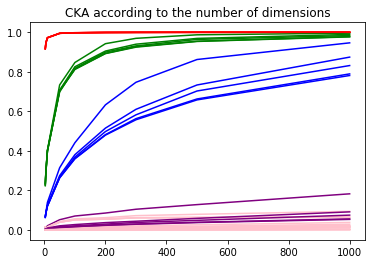

In [43]:
for i in range(len(num_pts_list)):
    for j in range(len(c_list)):
        if j == 0: color = 'r'
        elif j == 1: color = 'g'
        elif j == 2: color = 'b'
        elif j == 3: color = 'purple'
        else: color = 'pink'
        plt.plot(num_dims_list, data[i,:,j], c = color)
        
plt.title('CKA according to the number of dimensions')

Red is c=1, green is c=5, blue is c=10, purple is c= 50, pink is c>= 100
For low distances between Gaussians (small "c") CKA increases with the number of dimensions, althought it plateaus eventually.

Text(0.5, 1.0, 'CKA according to the number of points used to compute CKA')

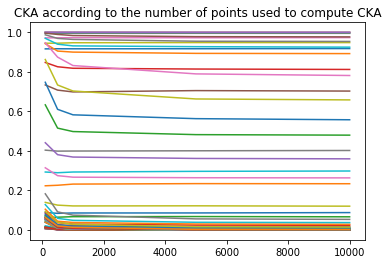

In [31]:
for i in range(len(num_dims_list)):
    for j in range(len(c_list)):
        plt.plot(num_pts_list, data[:,i,j])
        
plt.title('CKA according to the number of points used to compute CKA')

The number of points used to compute CKA does not affect the CKA value by much. Except at low number of points CKA values tend to be slightly higher but after 1000 points per Gaussian the CKA values remain stable.

# Second round of experiments:
- Keeping the number of points constant
- Increasing the number of dimensions tested
- Decreasing the number of distances tested and looking at smaller distances

### Generate and save the data

In [8]:
num_pts_list = [5000]
num_dims_list = [3, 5, 10, 50, 100, 200, 300, 500, 750, 1000, 1500, 2000, 3000, 5000, 10000]
c_list = [1, 5, 10, 25, 50, 75, 100, 200, 300, 400, 500]


data = np.zeros([len(num_pts_list), len(num_dims_list), len(c_list)])
for i1, num_pts in enumerate(num_pts_list):
    for i2, num_dims in enumerate(num_dims_list):
        for i3, c in enumerate(c_list):
            print('Num pts {}; num dims {}; c {}'.format(num_pts, num_dims, c))
            data[i1, i2, i3] = get_cka_test(num_dims = num_dims, num_pts = num_pts, c = c)
            
np.save('data/gaussian_exp_v2.npy', data)

Num pts 5000; num dims 3; c 1
Num pts 5000; num dims 3; c 5
Num pts 5000; num dims 3; c 10
Num pts 5000; num dims 3; c 25
Num pts 5000; num dims 3; c 50
Num pts 5000; num dims 3; c 75
Num pts 5000; num dims 3; c 100
Num pts 5000; num dims 3; c 200
Num pts 5000; num dims 3; c 300
Num pts 5000; num dims 3; c 400
Num pts 5000; num dims 3; c 500
Num pts 5000; num dims 5; c 1
Num pts 5000; num dims 5; c 5
Num pts 5000; num dims 5; c 10
Num pts 5000; num dims 5; c 25
Num pts 5000; num dims 5; c 50
Num pts 5000; num dims 5; c 75
Num pts 5000; num dims 5; c 100
Num pts 5000; num dims 5; c 200
Num pts 5000; num dims 5; c 300
Num pts 5000; num dims 5; c 400
Num pts 5000; num dims 5; c 500
Num pts 5000; num dims 10; c 1
Num pts 5000; num dims 10; c 5
Num pts 5000; num dims 10; c 10
Num pts 5000; num dims 10; c 25
Num pts 5000; num dims 10; c 50
Num pts 5000; num dims 10; c 75
Num pts 5000; num dims 10; c 100
Num pts 5000; num dims 10; c 200
Num pts 5000; num dims 10; c 300
Num pts 5000; num dims 

### Analyze results

Text(0.5, 1.0, 'CKA according to "c", the distance between the first and\nsecond Gaussians in the second set of representations')

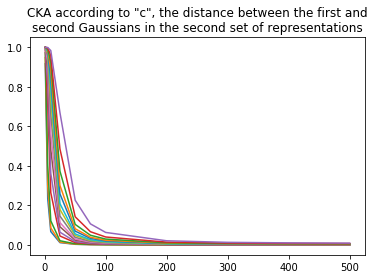

In [9]:
for i in range(len(num_pts_list)):
    for j in range(len(num_dims_list)):
        plt.plot(c_list, data[i,j,:])
        
plt.title('CKA according to "c", the distance between the first and\nsecond Gaussians in the second set of representations')

As expected CKA decreases pretty quickly as the distance between the two Gaussians in the second set of representations increases. The rate at which CKA drops is pretty dramatic, reaching sub 0.2 value almost from the start. (same as before)

Text(0.5, 1.0, 'CKA according to the number of dimensions')

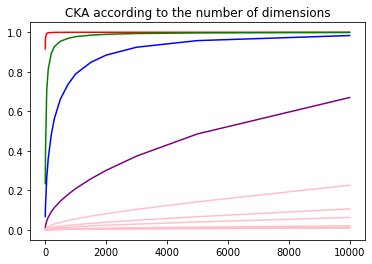

In [10]:
for i in range(len(num_pts_list)):
    for j in range(len(c_list)):
        if j == 0: color = 'r'
        elif j == 1: color = 'g'
        elif j == 2: color = 'b'
        elif j == 3: color = 'purple'
        else: color = 'pink'
        plt.plot(num_dims_list, data[i,:,j], c = color)
        
plt.title('CKA according to the number of dimensions')

Red is c=1, green is c=5, blue is c=10, purple is c= 25, pink is c>= 50
For low distances between Gaussians (small "c") CKA increases with the number of dimensions, althought it plateaus eventually. It seems like it would continue increasing forever...

The number of points was kept constant so nothing to report there.

# Toy experiments

### Translations

In [2]:
# Parameters
mean = 0
var = 1

num_dim = 200
num_pts = 10000 # per mixture component

seed = 0
np.random.seed(seed)
d = np.random.normal(0,1,[num_dim])
d /= np.linalg.norm(d)
c = 1000
cuda = torch.device('cuda')

X = np.random.normal(mean, var, [num_pts, num_dim])
Y = X+c*np.matmul(np.ones([num_pts, 1]),d.reshape([1, num_dim]))

X = torch.Tensor(X).to(cuda)
Y = torch.Tensor(Y).to(cuda)

# CKA = LinCKA()
# CKA(X,Y)[0].item()

In [6]:
del X,Y

In [5]:
np.mean(c*np.matmul(np.ones([num_pts, 1]),d.reshape([1, num_dim])),axis=0) - c*d

array([-5.31485966e-12,  8.10018719e-13,  3.49587026e-12,  2.35047537e-11,
        1.44950718e-12,  5.40012479e-13,  4.60431693e-12, -2.29505304e-12,
       -1.30917499e-12, -4.82103246e-12, -1.32871492e-12, -1.16955334e-11,
        3.91509047e-12, -6.73239242e-13, -4.84234874e-12,  4.90629759e-12,
        1.12834186e-11, -1.69642078e-12,  4.63629135e-12,  4.98090458e-12,
       -1.91846539e-11, -3.26849658e-12,  1.10489395e-11, -1.21787025e-11,
       -2.00373051e-11,  1.97388772e-11,  8.51763104e-13,  2.49400500e-12,
        1.50492951e-11,  1.08286713e-11,  1.69109171e-12,  6.75370870e-12,
       -5.93303184e-12,  1.31592515e-11,  6.29185593e-12,  8.15347789e-13,
        5.89750471e-12,  1.09707798e-11,  1.57385216e-12,  3.44613227e-12,
        1.37845291e-11,  2.65742983e-11, -9.40758582e-12, -1.89004368e-11,
       -1.10844667e-12,  2.20978791e-12,  6.52278231e-12,  1.24629196e-11,
        1.90425453e-12,  1.60049751e-12,  1.01891828e-11, -4.05009359e-12,
        3.67350594e-12, -

In [22]:
# ReLU case
# mean = 0
mean = 10
var = 1

num_dim = 200
num_pts = 10000 # per mixture component

seed = 0
np.random.seed(seed)
d = np.random.normal(0,1,[num_dim])
d /= np.linalg.norm(d)
d = np.abs(d)
c = 2000
cuda = torch.device('cuda')

X = np.random.normal(mean, var, [num_pts, num_dim])
Y = X+c*np.matmul(np.ones([num_pts, 1]),d.reshape([1, num_dim]))

X = torch.Tensor(X).to(cuda)
Y = torch.Tensor(Y).to(cuda)

CKA = LinCKA()
CKA(X,Y)[0].item()

0.9471241235733032

### Rotations

In [69]:
# Parameters
mean = 0
var = 1

num_dim = 200
num_pts = 10000 # per mixture component

# seed = 0
# np.random.seed(seed)
rotation_matrix = special_ortho_group.rvs(num_dim)
cuda = torch.device('cuda')

X = np.random.normal(mean, var, [num_pts, num_dim])
Y = np.matmul(X,rotation_matrix)

X = torch.Tensor(X).to(cuda)
Y = torch.Tensor(Y).to(cuda)

CKA = LinCKA()
CKA(X,Y)[0].item()

1.0

CKA is invariant to orthogonal transformations so unsurprisingly rotations do not affect CKA value...

### Random matrices

In [103]:
# Parameters
mean = 0
var = 1

num_dim = 200
num_pts = 10000 # per mixture component

# seed = 0
# np.random.seed(seed)
rotation_matrix = np.random.normal(0,1,[num_dim, num_dim])
if np.linalg.cond(rotation_matrix) < 1/sys.float_info.epsilon:
    pass
else:
    print("Error: matrix is not invertible.")


cuda = torch.device('cuda')

X = np.random.normal(mean, var, [num_pts, num_dim])
Y = np.matmul(X,rotation_matrix)

X = torch.Tensor(X).to(cuda)
Y = torch.Tensor(Y).to(cuda)

CKA = LinCKA()
CKA(X,Y)[0].item()

0.024850720539689064

# Figures for the workshop

## Translation

In [22]:
# Parameters

def translation_cka(mean = 0,
                    var = 1,
                    num_dims = 200,
                    num_pts = 10000,
                    seed = 0,
                    c = 1000):
    
    np.random.seed(seed)
    d = np.random.normal(0,1,[num_dim])
    d /= np.linalg.norm(d)
    cuda = torch.device('cuda')

    X = np.random.normal(mean, var, [num_pts, num_dim])
    Y = X+c*np.matmul(np.ones([num_pts, 1]),d.reshape([1, num_dim]))

    X = torch.Tensor(X).to(cuda)
    Y = torch.Tensor(Y).to(cuda)

    CKA = LinCKA()
    return CKA(X,Y)[0].item()

### First results

In [ ]:
num_pts_list = [100, 500, 1000, 5000]#, 10000 and 20000 points makes it crash have other things running as well...
num_dims_list = [3, 5, 10, 50, 100, 200, 300, 500, 1000]
c_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]


data = np.zeros([len(num_pts_list), len(num_dims_list), len(c_list)])
for i1, num_pts in enumerate(num_pts_list):
    for i2, num_dims in enumerate(num_dims_list):
        for i3, c in enumerate(c_list):
            print('Num pts {}; num dims {}; c {}'.format(num_pts, num_dims, c))
            data[i1, i2, i3] = translation_cka(num_dims = num_dims, num_pts = num_pts, c = c)
            
np.save('data/translation_cka_v0.npy', data)

Text(0.5, 1.0, 'CKA according to "c", the translation distance')

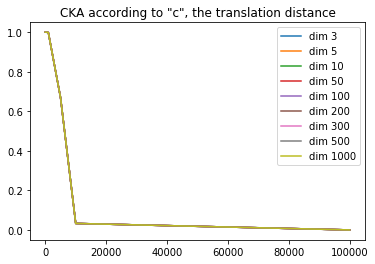

In [39]:
for i in range(len(num_pts_list)):
    for j in range(len(num_dims_list)):
        plt.plot(c_list[:-5], data[i,j,:][:-5], label = f'dim {num_dims_list[j]}')
        
plt.legend()
plt.title('CKA according to "c", the translation distance')

The different lines correspond to the different number of points used to compute CKA. The higher curves correspond to points with lesser number of points used to compute cka (This is good for us since in most scenarios the number of representations computed are very high)

Text(0.5, 1.0, 'CKA according to the number of dimensions')

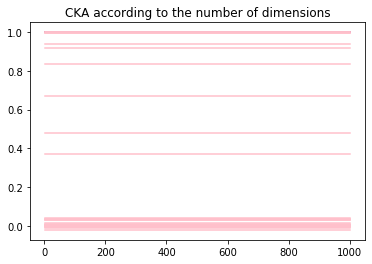

In [40]:
for i in range(len(num_pts_list)):
    for j in range(len(c_list)):
        if j == 0: color = 'r'
        elif j == 1: color = 'g'
        elif j == 2: color = 'b'
        elif j == 3: color = 'purple'
        else: color = 'pink'
        plt.plot(num_dims_list, data[i,:,j], c = color)
        
plt.title('CKA according to the number of dimensions')

Completely constant as opposed to the other scenario (two Gaussians that we split further and further apart).

Text(0.5, 1.0, 'CKA according to the number of points used to compute CKA')

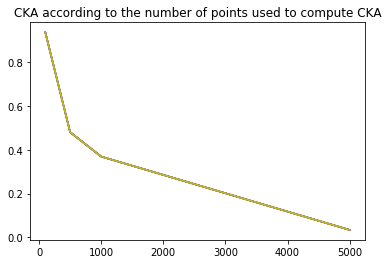

In [57]:
for i in range(len(num_dims_list)):
    for j in [9]:#range(len(c_list)):
        plt.plot(num_pts_list, data[:,i,j])
        
plt.title('CKA according to the number of points used to compute CKA')

Relatively constant except for two cases? Even gets negative for low values of c... pretty curious behaviour overall maybe I should take some time to dive deeper into these results at some point.

### Second version

In [69]:
num_pts_list = 10000#, 10000 and 20000 points makes it crash have other things running as well...
num_dims_list = 1000
num_seeds = 50
c_list = [1, 5, 10, 25, 50, 100, 500, 1000, 2500, 5000, 7500, 1e4, 1.5e4, 2e4]


data = np.zeros([num_seeds, len(c_list)])
for seed in range(num_seeds):
    print(f'seed {seed}')
    for i, c in enumerate(c_list):
#         print('c {}, seed{}'.format(c, seed))
        data[seed, i] = translation_cka(num_dims = num_dims, num_pts = num_pts, c = c, seed = seed)
            
np.save('data/translation_cka_fig_data_v0.npy', data)

seed 0
seed 1
seed 2
seed 3
seed 4
seed 5
seed 6
seed 7
seed 8
seed 9
seed 10
seed 11
seed 12
seed 13
seed 14
seed 15
seed 16
seed 17
seed 18
seed 19
seed 20
seed 21
seed 22
seed 23
seed 24
seed 25
seed 26
seed 27
seed 28
seed 29
seed 30
seed 31
seed 32
seed 33
seed 34
seed 35
seed 36
seed 37
seed 38
seed 39
seed 40
seed 41
seed 42
seed 43
seed 44
seed 45
seed 46
seed 47
seed 48
seed 49


Text(0.5, 1.0, 'CKA according to "c", the translation distance')

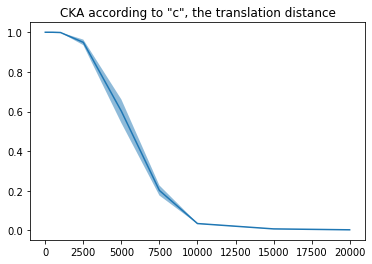

In [72]:
translation_means = np.mean(data, axis = 0)
translation_stds = np.std(data, axis = 0)

plt.plot(c_list, translation_means)
plt.fill_between(c_list, translation_means-translation_stds, translation_means+translation_stds, alpha = 0.5)

plt.title('CKA according to "c", the translation distance')

## Invertible linear transformations

In [2]:
def inv_lin_cka(pts_mean = 0,
                pts_var = 1,
                transform_mean = 0,
                transform_var = 1,
                num_dims = 200,
                num_pts = 10000,
                seed = 0):
    
    np.random.seed(seed)
    rotation_matrix = np.random.normal(transform_mean, transform_var,[num_dims, num_dims])
    while np.linalg.cond(rotation_matrix) >= 1/sys.float_info.epsilon:
        rotation_matrix = np.random.normal(transform_mean, transform_var,[num_dims, num_dims])

    cuda = torch.device('cuda')
    rotation_matrix = torch.Tensor(rotation_matrix).to(cuda)
    
    X = np.random.normal(pts_mean, pts_var, [num_pts, num_dims])
    X = torch.Tensor(X).to(cuda)
    
    Y = torch.mm(X,rotation_matrix)

    CKA = LinCKA()
    return CKA(X,Y)[0].item()

## First version (not runned since too long)

In [ ]:
num_pts_list = [100, 500, 1000, 5000, 10000]#, 10000 and 20000 points makes it crash have other things running as well...
num_dims_list = [3, 5, 10, 50, 100, 200, 300, 500, 1000, 5000]
mu_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5]#, 1e6, 1e7, 1e8, 1e9, 1e10]
sigma_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5]#, 1e6, 1e7, 1e8, 1e9, 1e10]
# this is too long, too agressive and some non-invertible matrices were found.


data = np.zeros([len(num_pts_list), len(num_dims_list), len(mu_list), len(sigma_list)])
for i1, num_pts in enumerate(num_pts_list):
    for i2, num_dims in enumerate(num_dims_list):
        for i3, mu in enumerate(mu_list):
            for i4, sigma in enumerate(sigma_list):
                print('Num pts {}; num dims {}; mu {}; sigma {}'.format(num_pts, num_dims, mu, sigma))
                data[i1, i2, i3, i4] = inv_lin_cka(num_dims = num_dims, num_pts = num_pts, transform_mean = mu, transform_var = sigma)
    np.save('data/inv_lin_cka_v0.npy', data)

Text(0.5, 1.0, 'CKA according to "c", the translation distance')

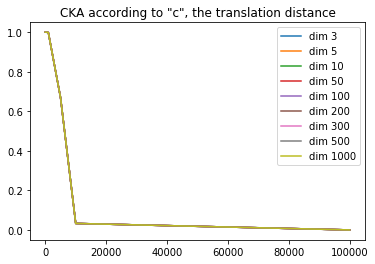

In [39]:
for i in range(len(num_pts_list)):
    for j in range(len(num_dims_list)):
        for k in range(len(mu_list)):
            plt.plot(sigma_list, data[i,j,k,:])
        
plt.legend()
plt.title(r'CKA according to $\sigma$, standard deviation')

The different lines correspond to the different number of points used to compute CKA. The higher curves correspond to points with lesser number of points used to compute cka (This is good for us since in most scenarios the number of representations computed are very high)

Text(0.5, 1.0, 'CKA according to the number of dimensions')

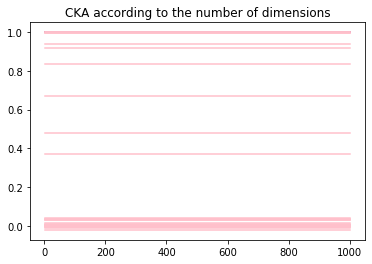

In [40]:
for i in range(len(num_pts_list)):
    for j in range(len(c_list)):
        if j == 0: color = 'r'
        elif j == 1: color = 'g'
        elif j == 2: color = 'b'
        elif j == 3: color = 'purple'
        else: color = 'pink'
        plt.plot(num_dims_list, data[i,:,j], c = color)
        
plt.title('CKA according to the number of dimensions')

Completely constant as opposed to the other scenario (two Gaussians that we split further and further apart).

Text(0.5, 1.0, 'CKA according to the number of points used to compute CKA')

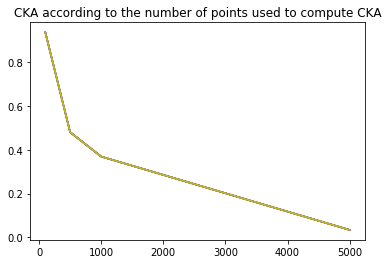

In [57]:
for i in range(len(num_dims_list)):
    for j in [9]:#range(len(c_list)):
        plt.plot(num_pts_list, data[:,i,j])
        
plt.title('CKA according to the number of points used to compute CKA')

Relatively constant except for two cases? Even gets negative for low values of c... pretty curious behaviour overall maybe I should take some time to dive deeper into these results at some point.

### Second version

In [4]:
num_pts = 5000#, 10000 and 20000 points makes it crash have other things running as well...
num_dims = 500
num_seeds = 10
mu_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5]
sigma_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5]


data = np.zeros([num_seeds, len(mu_list), len(sigma_list)])
for seed in range(num_seeds):
    print(f'seed {seed}')
    for i1, mu in enumerate(mu_list):
        for i2, sigma in enumerate(sigma_list):
            data[seed, i1, i2] = inv_lin_cka(num_dims = num_dims, num_pts = num_pts, transform_mean=mu, transform_var=sigma, seed = seed)
            
np.save('data/inv_lin_cka_fig_data_v0.npy', data)

seed 0
seed 1
seed 2
seed 3
seed 4
seed 5
seed 6
seed 7
seed 8
seed 9


In [2]:
data = np.load('data/inv_lin_cka_fig_data_v0.npy')

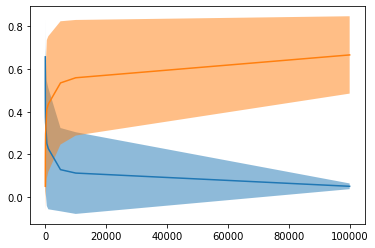

In [6]:
mu_means = np.mean(data, axis = (0,2))
mu_stds = np.std(data, axis = (0,2))
sigma_means = np.mean(data, axis = (0,1))
sigma_stds = np.std(data, axis = (0,1))

mu_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5]
sigma_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5]


plt.plot(mu_list, mu_means)
plt.fill_between(mu_list, mu_means-mu_stds, mu_means+mu_stds, alpha = 0.5)

plt.plot(sigma_list, sigma_means)
plt.fill_between(sigma_list, sigma_means-sigma_stds, sigma_means+sigma_stds, alpha = 0.5)

# plt.title('CKA according to "c", the translation distance')

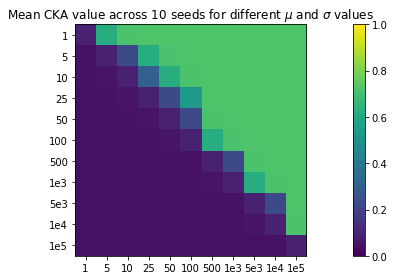

In [19]:
mean_data = np.mean(data, axis = 0)

mu_list_labels = ['1', '5', '10', '25', '50', '100', '500', '1e3', '5e3', '1e4', '1e5']
sigma_list_labels = ['1', '5', '10', '25', '50', '100', '500', '1e3', '5e3', '1e4', '1e5']
     
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(mean_data, interpolation ='nearest', vmin=0, vmax=1)
fig.colorbar(cax)
ax.set_title(r'Mean CKA value across 10 seeds for different $\mu$ and $\sigma$ values')
ax.set_xticks(np.arange(len(sigma_list)))
ax.set_yticks(np.arange(len(mu_list)))
ax.set_xticklabels(sigma_list_labels)
ax.set_yticklabels(mu_list_labels)
ax.axis('image')
# plt.ticklabel_format(axis="x", style="sci")
# plt.ticklabel_format(axis="y", style="sci")
plt.tight_layout()
#         plt.savefig('figures/split_exp_figures_v1/split_class_exp_train_{}pts_'.format(num_pts_cka)+dirr+'.png')

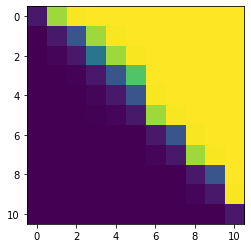

In [8]:
mean_data = np.mean(data, axis = 0)
plt.imshow(mean_data)

In [9]:
mean_data

array([[0.09318476, 0.62479153, 0.71591798, 0.72366666, 0.72384795,
        0.72385473, 0.72385221, 0.72385187, 0.72385159, 0.72385155,
        0.72385153],
       [0.04832829, 0.09318476, 0.22473788, 0.62479153, 0.71591797,
        0.72337363, 0.72385471, 0.72385329, 0.72385187, 0.72385168,
        0.72385153],
       [0.04691394, 0.05820526, 0.09318476, 0.31025108, 0.62479153,
        0.71591797, 0.72384796, 0.72385471, 0.72385221, 0.72385187,
        0.72385156],
       [0.04651706, 0.04832829, 0.05397617, 0.09318476, 0.22473788,
        0.53907259, 0.72337363, 0.72383241, 0.7238533 , 0.72385241,
        0.72385159],
       [0.04646007, 0.04691394, 0.04832829, 0.05820526, 0.09318476,
        0.22473788, 0.71591797, 0.72337363, 0.72385467, 0.7238533 ,
        0.72385168],
       [0.0464457 , 0.04655967, 0.04691394, 0.04938816, 0.05820526,
        0.09318476, 0.62479154, 0.71591797, 0.72384795, 0.72385467,
        0.72385186],
       [0.04644097, 0.0464457 , 0.04646007, 0.04655967, 0.